# sql_magic API

## Load extension

In [1]:
%load_ext sql_magic

## Connect to Spark engine

In [2]:
%config SQLConn.conn_object_name='spark'

In [3]:
%%readsql
SELECT 1

,1
0,1


## Use sql_magic with a psycopg2 connection

In [2]:
import pandas.io.sql as psql
import psycopg2
connect_credentials = {'database': 'postgres',
                       'host': 'localhost',
                       'password': '',
                       'user': 'postgres'}

# connect to postgres connection object
conn = psycopg2.connect(**connect_credentials)
conn.autocommit = True
schema_name = 'template'
psql.execute('SET search_path TO {}'.format(schema_name), conn)

<cursor object at 0x10cee1900; closed: 0>

In [3]:
%config SQLConn.conn_object_name='conn'

In [4]:
%%readsql
SELECT version()

,version
0,"PostgreSQL 9.6.3 on x86_64-apple-darwin14.5.0,..."


## Use sql_magic with a SQLAlchemy Engine

In [5]:
# sqllite conn
from sqlalchemy import create_engine
from sqlite3 import dbapi2 as sqlite
sqllite_engine = create_engine('sqlite+pysqlite:///test.db', module=sqlite)

In [6]:
%config SQLConn.conn_object_name='sqllite_engine'

In [7]:
%%readsql
SELECT sqlite_version();

,sqlite_version()
0,3.13.0


## Load dataset for example

In [17]:
# read in sample dataset
import pandas as pd
from sqlalchemy import create_engine
titanic_csv = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic_df = pd.read_csv(titanic_csv)[['sex','age','fare']]

# create postgres table
engine = create_engine('postgresql://{user}:{password}@{host}:5432/{database}'.format(**connect_credentials))
titanic_df.to_sql('titanic', engine, schema = 'template', if_exists='replace', index = False)

In [ ]:

# register as spark dataframe/table
titanic_df_spark = spark.createDataFrame(titanic_df, schema=titanic_df.columns.tolist())
sqlContext.registerDataFrameAsTable(titanic_df_spark, 'titanic')

## Miscelleanous results

### Execute sql (not required for spark connections)
Queries with no result are run with %%execsql

In [21]:
%config SQLConn.conn_object_name='conn'

In [22]:
%%execsql
DROP TABLE IF EXISTS example_table;
CREATE TEMP TABLE example_table
AS
SELECT 1;

NameError: name 'notify_obj' is not defined

In [17]:
%%readsql
DROP TABLE IF EXISTS example_table;

NoQueryResult: Query doesn't return a result; please use %%execsql

### Assign result to pandas dataframe

In [13]:
%config SQLConn.conn_object_name='conn'

In [14]:
%%readsql df
SELECT *
FROM titanic

,sex,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500
5,male,NaN,8.4583
6,male,54.0,51.8625
7,male,2.0,21.0750
8,female,27.0,11.1333
9,female,14.0,30.0708


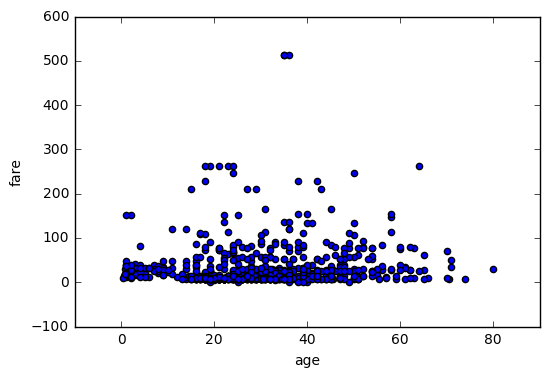

In [15]:
%matplotlib inline
df.plot('age', 'fare',kind='scatter')

### Utilize Python variables in SQL query

In [16]:
age_thresh = 22
sex = 'male'

In [17]:
%%readsql df
SELECT *
FROM titanic
WHERE (age < {age_thresh}) AND (sex = '{sex}')

,sex,age,fare
0,male,2.00,21.0750
1,male,20.00,8.0500
2,male,2.00,29.1250
3,male,19.00,263.0000
4,male,21.00,8.0500
5,male,7.00,39.6875
6,male,21.00,7.8000
7,male,11.00,46.9000
8,male,4.00,27.9000
9,male,19.00,8.1583


## Asynchronous calls
Queries can be run in async mode using the --async (or -a) flag. Displaying results from async calls are disabled by default.

In [16]:
%%readsql df -a
SELECT *
FROM titanic

# Configuration

## Flags
Notifications and auto-display can be temporarily disabled with flags:
<pre>
positional arguments:
  table_name

optional arguments:
  -h, --help     show this help message and exit
  -n, --notify   Toggle option for notifying query result
  -a, --async    Run query in seperate thread. Please be cautious when
                 assigning result to a variable
  -d, --display  Toggle option for outputing query result
</pre>
  

In [19]:
%%readsql
SELECT 1

,?column?
0,1


In [20]:
%%readsql -d
SELECT 1

## Defaults
Notifications and displaying results are enabled by default, but can be turned off with %config magic

In [21]:
# alerts and display are automatically enabled
%config SQLConn

SQLConn options
-------------
SQLConn.conn_object_name=<Unicode>
    Current: u'conn'
    Object name for accessing computing resource environment
SQLConn.notify_result=<Bool>
    Current: True
    Notify query result to stdout
SQLConn.output_result=<Bool>
    Current: True
    Output query result to stdout


In [22]:
%config SQLConn.output_result = False

In [23]:
%%readsql
SELECT 1